In [1]:
#import 
import numpy as np
import pandas as pd
import geopandas as gpd
import folium
import json
import matplotlib.pyplot as plt
from shapely.geometry import Point
#visualize the path of Hurricane Florence
## get the map of usa


In [2]:
usa = gpd.read_file("gz_2010_us_040_00_500k.json")

In [3]:
usa.head()

,GEO_ID,STATE,NAME,LSAD,CENSUSAREA,geometry
0,0400000US23,23,Maine,,30842.923,"(POLYGON ((-67.619761 44.519754, -67.61541 44...."
1,0400000US25,25,Massachusetts,,7800.058,"(POLYGON ((-70.832044 41.606504, -70.823735 41..."
2,0400000US26,26,Michigan,,56538.901,"(POLYGON ((-88.684434 48.115785, -88.675628 48..."
3,0400000US30,30,Montana,,145545.801,"POLYGON ((-104.057698 44.997431, -104.250145 4..."
4,0400000US32,32,Nevada,,109781.180,"POLYGON ((-114.0506 37.000396, -114.049995 36...."


In [4]:
type(usa)
type(usa.geometry)
type(usa.GEO_ID)

pandas.core.series.Series

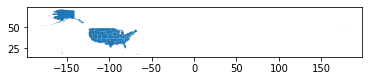

In [5]:
usa.plot()

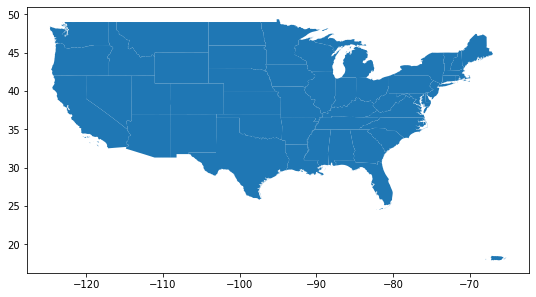

In [6]:
## exclude Alaska and Hawaii

usa=usa[usa["NAME"].isin(["Alaska","Hawaii"])==False]
usa.plot(figsize=(9,7))

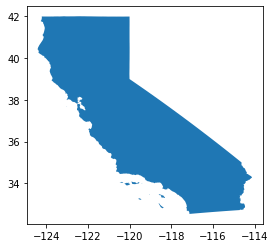

In [7]:
## where is california
ca = usa[usa['NAME']=="California"]
ca.plot()

In [8]:
#read the hurrican file

florence=pd.read_csv("stormhistory.csv")
florence.head()

,AdvisoryNumber,Date,Lat,Long,Wind,Pres,Movement,Type,Name,Received,Forecaster
0,1,08/30/2018 11:00,12.9,18.4,30,1007,W at 12 MPH (280 deg),Potential Tropical Cyclone,Six,08/30/2018 10:45,Avila
1,1A,08/30/2018 14:00,12.9,19.0,30,1007,W at 12 MPH (280 deg),Potential Tropical Cyclone,Six,08/30/2018 13:36,Avila
2,2,08/30/2018 17:00,12.9,19.4,30,1007,W at 9 MPH (280 deg),Potential Tropical Cyclone,Six,08/30/2018 16:36,Avila
3,2A,08/30/2018 20:00,13.1,20.4,30,1007,W at 11 MPH (280 deg),Potential Tropical Cyclone,Six,08/30/2018 19:44,Beven
4,3,08/30/2018 23:00,13.2,20.9,35,1007,W at 13 MPH (280 deg),Potential Tropical Cyclone,Six,08/30/2018 22:42,Beven


In [9]:
#EDA on florence

print(florence.Wind.min())
print(florence.Wind.max())

25
140


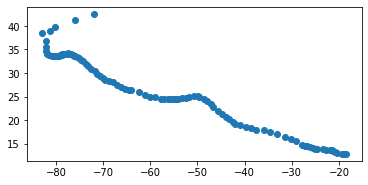

In [10]:
# given that flornece is  not a geodataframe, then we will need
# to transform it to a GeoDataFrame with the follwoing step

#Note the longtitude should be negative
#This is not always necessary
florence['Long']= 0 - florence['Long']

#step 1: combine the lat and long to create hurricane coordinates
florence["coordinates"]=florence[["Long","Lat"]].values.tolist()
florence.head()

#step 2: change the coordinate to a Point data structure
# so that you can add it to a map. The Point method comes from Shapely package
florence['coordinates']=florence['coordinates'].apply(Point)
florence.head()

##step 3: Convert florence from a df to a GeoDataFrame

florence = gpd.GeoDataFrame(florence, geometry="coordinates")
type(florence)
florence.plot()

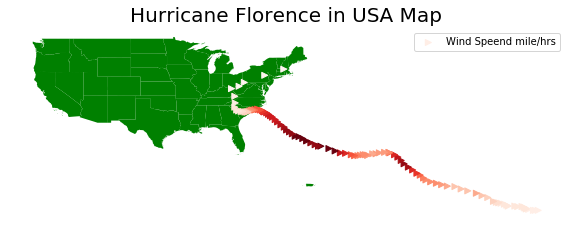

In [11]:
##Visualize the path of the hurricane on top of the USA map
fig, ax = plt.subplots(1,figsize=(10,7))
base = usa.plot(ax=ax, color="green")
florence.plot(ax=base,marker=">", column="Wind", cmap="Reds", label= "Wind Speend mile/hrs")
ax.axis("off")
plt.legend()
plt.title("Hurricane Florence in USA Map", fontsize=20)
plt.show()

Text(0.5, 1, 'Nashville School Districts')

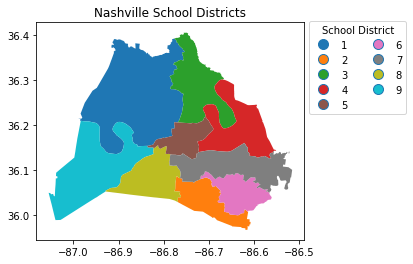

In [12]:
## Use the school_district.geojson
school_district = gpd.read_file("school_districts.geojson")
school_district.head()

##define some legend parameters

lgnd_kwds = {"title": "School District",
            "loc": "upper left",
            "bbox_to_anchor": (1,1.03),
            "ncol": 2}

school_district.plot(column = "district", legend=True, legend_kwds =lgnd_kwds )
plt.title("Nashville School Districts")

In [13]:
school_district.head()
## inspect the CRS (coordinate reference system)
school_district.crs

## EPSG: European Petrolum Survey Group
## EPSG:4326 = units are in degrees (Used by Google Earth)
## EPSG 3857 - units are in meters (used by Google Map, Bing Map, Open Street)

{'init': 'epsg:4326'}

In [14]:
import pyproj
pyproj.Proj("+init=epsg:4326")

pyproj.Proj('+units=m +init=epsg:4326', preserve_units=True)

In [15]:
school_district.crs = {'init': 'epsg:4326'}

In [18]:
#to_change from degrees to metere

school_district.geometry.to_crs(epsg=3857)

0    (POLYGON ((-9659344.055955959 4353528.76657080...
1    (POLYGON ((-9657371.823286682 4356392.67733572...
2    (POLYGON ((-9658854.027487349 4312092.82910009...
3    (POLYGON ((-9638150.956222074 4329465.54281298...
4    (POLYGON ((-9681775.712517204 4329318.21668786...
5    (POLYGON ((-9663476.56933846 4320928.175478509...
6    (POLYGON ((-9651096.617494684 4328747.06192736...
7    (POLYGON ((-9652022.127735659 4313956.53000063...
8    (POLYGON ((-9635605.154815713 4319880.30765459...
Name: geometry, dtype: object

In [17]:
type(school_district.geometry)
school_district.geometry.to_crs(epsg=3857).area

0    5.631344e+08
1    2.183699e+08
2    1.276154e+08
3    2.168715e+08
4    3.532321e+08
5    1.641375e+08
6    9.846963e+07
7    1.197423e+08
8    2.301357e+08
dtype: float64

In [73]:
#GeoSeries Centroid
center = school_district.geometry.centroid
center

0     POINT (-86.86086595994405 36.2628221811899)
1    POINT (-86.72361421487962 36.28515517790142)
2    POINT (-86.70156420691957 36.03021153030475)
3    POINT (-86.63964402189863 36.19696692376599)
4    POINT (-86.95428425398846 36.10392411644131)
5    POINT (-86.82738771169281 36.08341995053765)
6    POINT (-86.75214735715096 36.16995457037151)
7    POINT (-86.63366342590973 36.04945650103935)
8    POINT (-86.64295870758193 36.10809747821918)
dtype: object

In [78]:
ctr1 = center[0]
ctr2 = center[1]
ctr1.distance(ctr2)

0.13905683825453657

In [109]:
#use foliumn to show the map of USC
import folium
import webbrowser

filepath = "C:/Users/user/Desktop/python/week 10/lecture data/usc_map.html"
logoIcon = folium.features.CustomIcon(marshalllogo,icon_size=(50,50))

m = folium.Map(location=[34.0186834,-118.2860637],zoom_start = 16)
folium.Marker([34.0186834,-118.2860637],popup="USC Marshall</b>",icon=logoIcon).add_to(m)
folium.CircleMarker([34.0186834,-118.2860637],radius=150, popup="University of Southern California", color="#428bca",fill=True
                   ,fill_color="#428bca").add_to(m)
m.save(filepath)
webbrowser.open("file://"+filepath)

True

In [102]:
marshalllogo= "C:/Users/user/Desktop/python/week 10/lecture data/uscmarshall.jpeg"
